# Загружаем данные:

In [53]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
import numpy as np
import datetime
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (18, 5)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from catboost import CatBoostRegressor
import shap

In [54]:
df_train = pd.read_excel('Problem1.xlsx', sheet_name='Обучение')
df_train

Дата рейса Откуда Куда Продолжительность рейса   ВС  Мест на рейсе  \
0    2018-03-31    VKO  HKT               > 6 часов  ВС1            522   
1    2018-03-31    VKO  HKT               > 6 часов  ВС1            522   
2    2018-03-31    VKO  HKT               > 6 часов  ВС1            522   
3    2018-03-31    VKO  PRG               < 3 часов  ВС2            189   
4    2018-03-30    VKO  HKT               > 6 часов  ВС1            522   
...         ...    ...  ...                     ...  ...            ...   
1745 2016-10-02    VKO  LCA         от 3 до 6 часов  ВС1            522   
1746 2016-10-01    LED  LCA         от 3 до 6 часов  ВС1            522   
1747 2016-10-01    VKO  LCA         от 3 до 6 часов  ВС1            522   
1748 2016-10-01    VKO  LCA         от 3 до 6 часов  ВС1            522   
1749 2016-10-01    LED  LCA         от 3 до 6 часов  ВС1            522   

     Тип услуги  Доступных мест услуги  Цена, руб  Фактический спрос  
0             A                     45     1825.0                 38  
1            SU                     27     6205.0                 23  
2             S                     39     4380.0                 18  
3             F                      9      803.0                  4  
4             A                     45     1825.0                 42  
...         ...                    ...        ...                ...  
1745         SU                     27     3450.0                  4  
1746          S                     36     1725.0                  0  
1747          S                     39     1725.0                  0  
1748         SU                     27     3450.0                  0  
1749          A                     47      828.0                  2  

[1750 rows x 10 columns]

In [55]:
df_test = pd.read_excel('Problem1.xlsx', sheet_name='Тест')
df_test

Дата рейса Откуда Куда Продолжительность рейса   ВС  Мест на рейсе  \
0   2018-04-01    VKO  LCA         от 3 до 6 часов  ВС1            522   
1   2018-04-01    VKO  LCA         от 3 до 6 часов  ВС1            522   
2   2018-04-01    VKO  PRG               < 3 часов  ВС2            189   
3   2018-04-02    VKO  BKK               > 6 часов  ВС1            522   
4   2018-04-02    VKO  HKT               > 6 часов  ВС1            522   
..         ...    ...  ...                     ...  ...            ...   
157 2018-04-30    VKO  BKK               > 6 часов  ВС1            522   
158 2018-04-30    LED  LCA         от 3 до 6 часов  ВС1            522   
159 2018-04-30    VKO  BKK               > 6 часов  ВС1            522   
160 2018-04-30    VKO  PRG               < 3 часов  ВС2            189   
161 2018-04-30    VKO  BKK               > 6 часов  ВС1            522   

    Тип услуги  Доступных мест услуги  Цена, руб  
0            S                     39     1460.0  
1           SU                     27     2555.0  
2            F                      9      803.0  
3            A                     45     1168.0  
4            A                     45     1825.0  
..         ...                    ...        ...  
157         SU                     27     5400.0  
158          A                     45      864.0  
159          A                     45     1008.0  
160          F                      9      792.0  
161          C                    275      360.0  

[162 rows x 9 columns]

In [56]:
df = pd.concat([df_train, df_test])
df

Дата рейса Откуда Куда Продолжительность рейса   ВС  Мест на рейсе  \
0   2018-03-31    VKO  HKT               > 6 часов  ВС1            522   
1   2018-03-31    VKO  HKT               > 6 часов  ВС1            522   
2   2018-03-31    VKO  HKT               > 6 часов  ВС1            522   
3   2018-03-31    VKO  PRG               < 3 часов  ВС2            189   
4   2018-03-30    VKO  HKT               > 6 часов  ВС1            522   
..         ...    ...  ...                     ...  ...            ...   
157 2018-04-30    VKO  BKK               > 6 часов  ВС1            522   
158 2018-04-30    LED  LCA         от 3 до 6 часов  ВС1            522   
159 2018-04-30    VKO  BKK               > 6 часов  ВС1            522   
160 2018-04-30    VKO  PRG               < 3 часов  ВС2            189   
161 2018-04-30    VKO  BKK               > 6 часов  ВС1            522   

    Тип услуги  Доступных мест услуги  Цена, руб  Фактический спрос  
0            A                     45     1825.0               38.0  
1           SU                     27     6205.0               23.0  
2            S                     39     4380.0               18.0  
3            F                      9      803.0                4.0  
4            A                     45     1825.0               42.0  
..         ...                    ...        ...                ...  
157         SU                     27     5400.0                NaN  
158          A                     45      864.0                NaN  
159          A                     45     1008.0                NaN  
160          F                      9      792.0                NaN  
161          C                    275      360.0                NaN  

[1912 rows x 10 columns]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1912 entries, 0 to 161
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Дата рейса               1912 non-null   datetime64[ns]
 1   Откуда                   1912 non-null   object        
 2   Куда                     1912 non-null   object        
 3   Продолжительность рейса  1912 non-null   object        
 4   ВС                       1912 non-null   object        
 5   Мест на рейсе            1912 non-null   int64         
 6   Тип услуги               1912 non-null   object        
 7   Доступных мест услуги    1912 non-null   int64         
 8   Цена, руб                1912 non-null   float64       
 9   Фактический спрос        1750 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 164.3+ KB


Пропуски в данных отсутсвуют.

Посмотрим упорядоченные по дате данные:

In [58]:
df_time = df.set_index('Дата рейса')
df_time.head(2)

Откуда Куда Продолжительность рейса   ВС  Мест на рейсе Тип услуги  \
Дата рейса                                                                      
2018-03-31    VKO  HKT               > 6 часов  ВС1            522          A   
2018-03-31    VKO  HKT               > 6 часов  ВС1            522         SU   

            Доступных мест услуги  Цена, руб  Фактический спрос  
Дата рейса                                                       
2018-03-31                     45     1825.0               38.0  
2018-03-31                     27     6205.0               23.0

In [59]:
resampled_data =df_time.resample('D').sum() 
resampled_data

Мест на рейсе  Доступных мест услуги  Цена, руб  Фактический спрос
Дата рейса                                                                    
2016-10-01           2088                    149     7728.0                2.0
2016-10-02           1044                     66     5175.0                7.0
2016-10-03           2088                    151     7728.0               29.0
2016-10-04              0                      0        0.0                0.0
2016-10-05              0                      0        0.0                0.0
...                   ...                    ...        ...                ...
2018-04-26           3843                    505    16416.0                0.0
2018-04-27           5409                    361    41832.0                0.0
2018-04-28           3321                    224    13176.0                0.0
2018-04-29           1233                     75     5832.0                0.0
2018-04-30           5931                    656    24552.0                0.0

[577 rows x 4 columns]

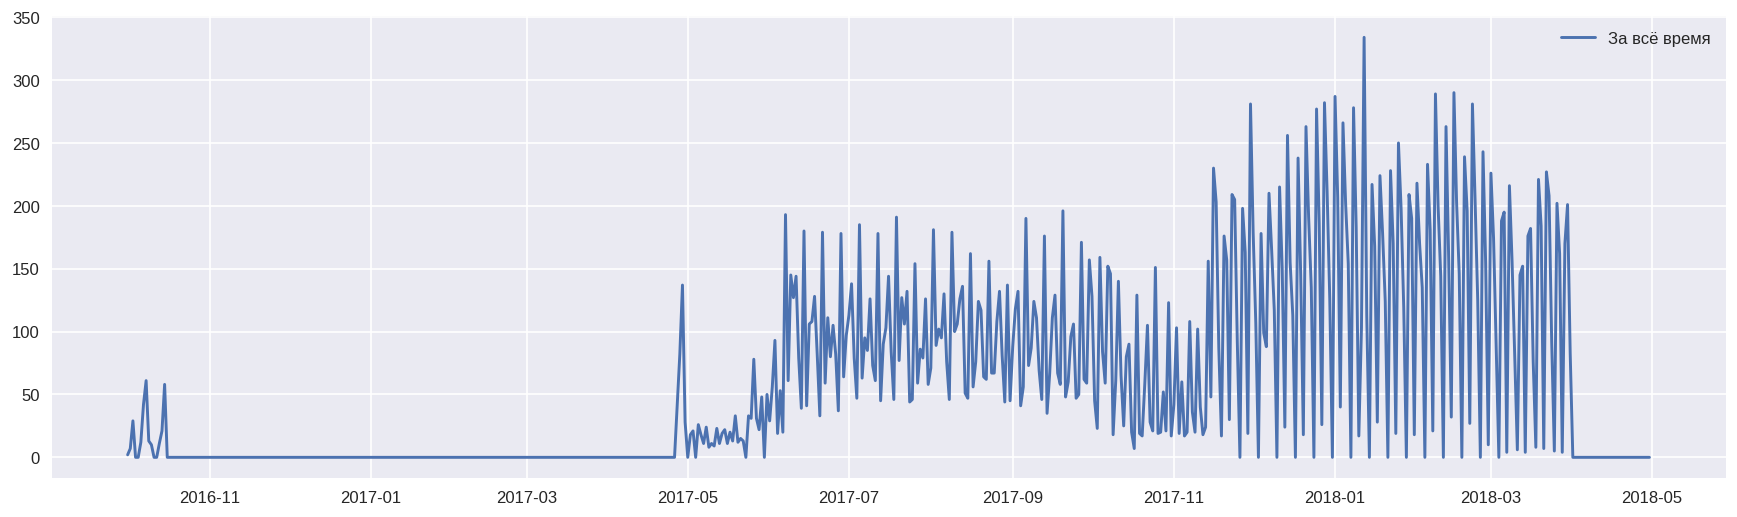

In [60]:
plt.plot(resampled_data['Фактический спрос'], label='За всё время')
plt.legend();

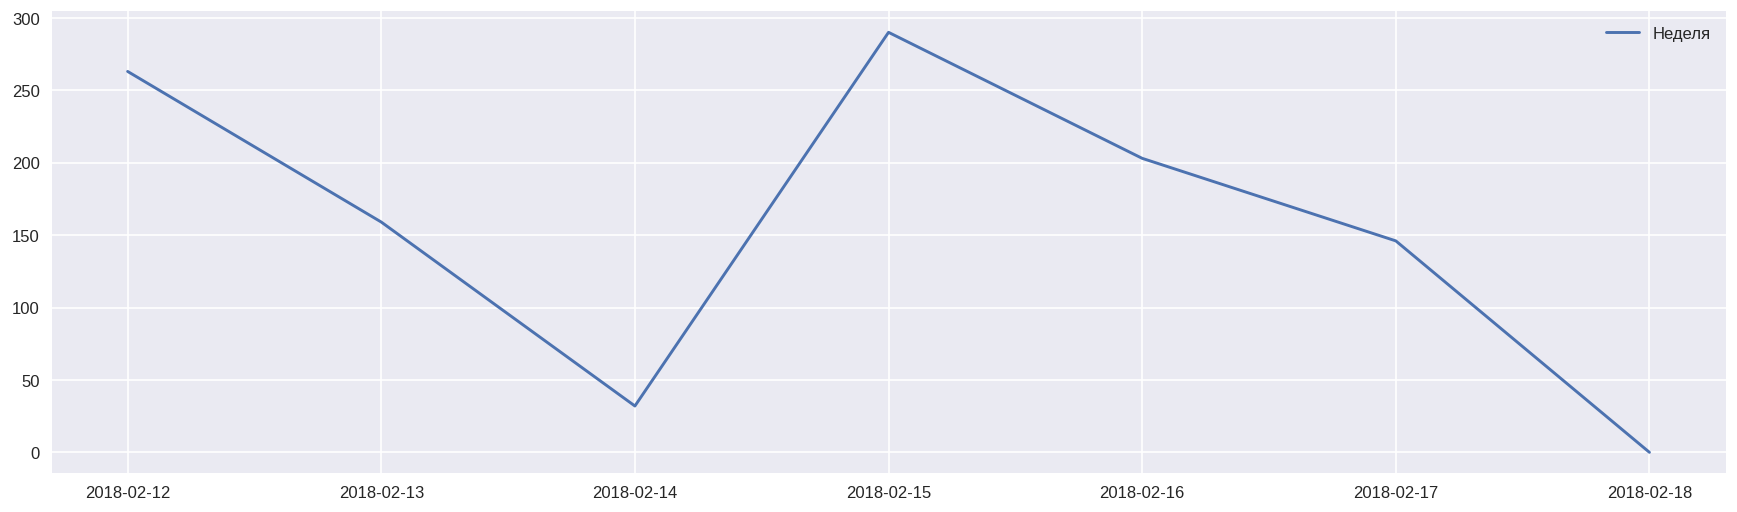

In [61]:
plt.plot(resampled_data['Фактический спрос'][499:506], label='Неделя')
plt.legend();

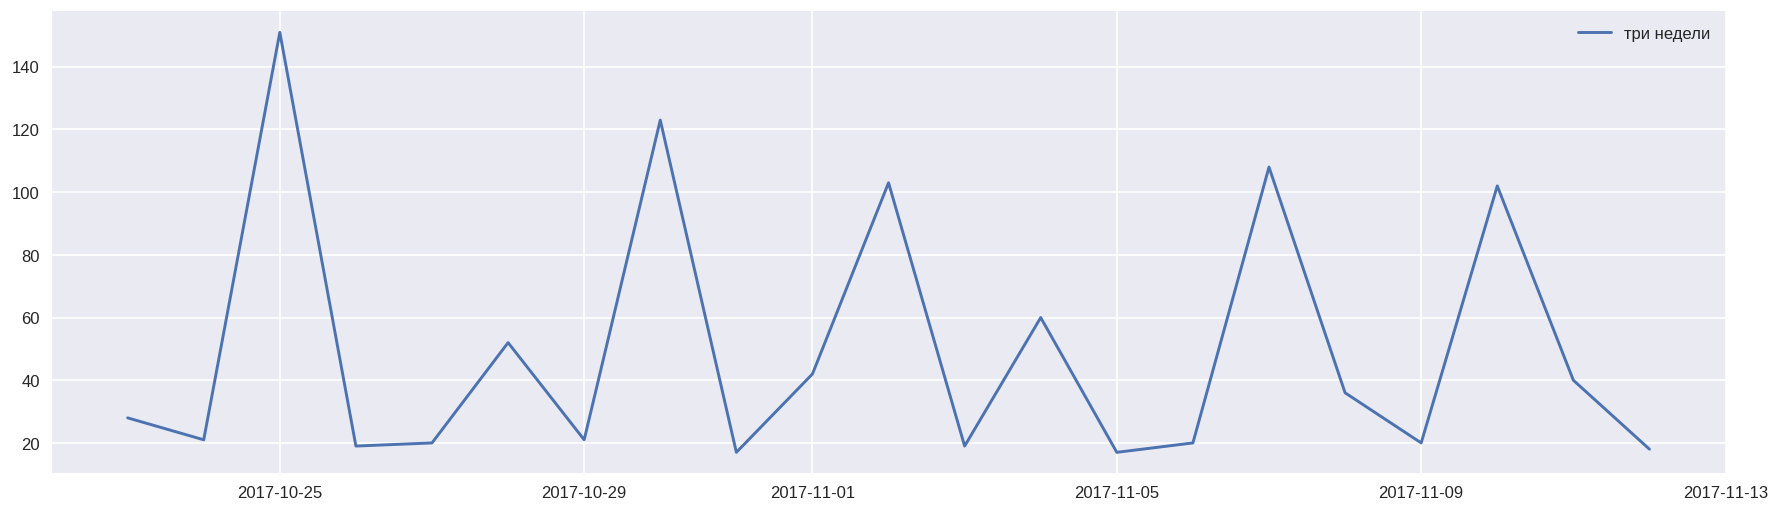

In [62]:
plt.plot(resampled_data['Фактический спрос'][387:408], label='три недели')
plt.legend();

Видно, что пики в данных повтояются через приблизительно равные промежутки времени, значит, на спрос влияет день недели. Кроме того, данные зависят и от сезона (в разные месяцы спрос разный).

Данные по датам можно было бы обогатить данными о времени вылета рейса. Из этого можно будет сделать вывод является ли рейс ночным или дневным. Например, на ночном рейсе будут более востребованы услуги, связанные с комфортом сна (более комфортное место, пледы и т.п.), но менее востребованы услуги по предоставлению еды. 

# Анализ уникальных значений

Проанализируем уникальные значения:

In [63]:
df['Откуда'].unique()

array(['VKO', 'LED', 'OVB', 'PEE', 'OMS', 'SVX', 'CEK'], dtype=object)

In [64]:
df['Куда'].unique()

array(['HKT', 'PRG', 'PUJ', 'BKK', 'SHJ', 'DXB', 'LCA', 'NBE', 'CFU',
       'BCN', 'HER', 'RHO'], dtype=object)

Все рейсы являются международными. Все аэропорты вылета - российские, прилёта - зарубежные.

Перелёты совершаются в 8 стран:

1) Чехия 43214

2) Испания 47125

3) Греция 55690

4) Тунис 65402

5) ОАЭ 71990 

6) Кипр 81706

7) Таиланд 82924

8) Доминиканская республика 135919

Числа указывают среднюю стоимость тура в рублях в данную страну (данные взяты мною с сайта https://travelinka.ru/srednyaya-stoimost-turov-po-stranam/#i-3 и являются достаточно релевантными для изучаемого периода)


Создадим словарь для аэропортов прилёта в соотвествии со средней стоимостью тура в данную страну:

In [65]:
dict_countries = {'HKT':7, 'PRG':1, 'PUJ':8, 'BKK':7, 'SHJ':5, 'DXB':5, 
       'LCA':6, 'NBE':4, 'CFU':3,'BCN':2, 'HER':3, 'RHO':3}

In [66]:
df['Продолжительность рейса'].unique()

array(['> 6 часов', '< 3 часов', 'от 3 до 6 часов'], dtype=object)

In [67]:
df['ВС'].unique()

array(['ВС1', 'ВС2'], dtype=object)

In [68]:
df['Мест на рейсе'].unique()

array([522, 189, 373, 457])

In [69]:
df.groupby(['ВС'])['Мест на рейсе'].unique()

ВС
ВС1    [522, 373, 457]
ВС2              [189]
Name: Мест на рейсе, dtype: object

Всего в наличии 4 модификации самолётов.

In [70]:
df['Тип услуги'].unique()

array(['A', 'SU', 'S', 'F', 'C'], dtype=object)

In [71]:
df['Доступных мест услуги'].unique()

array([ 45,  27,  39,   9,  36, 275,  29,  21, 339,  40,  47])

Посмотрим графики по категориальным данным:

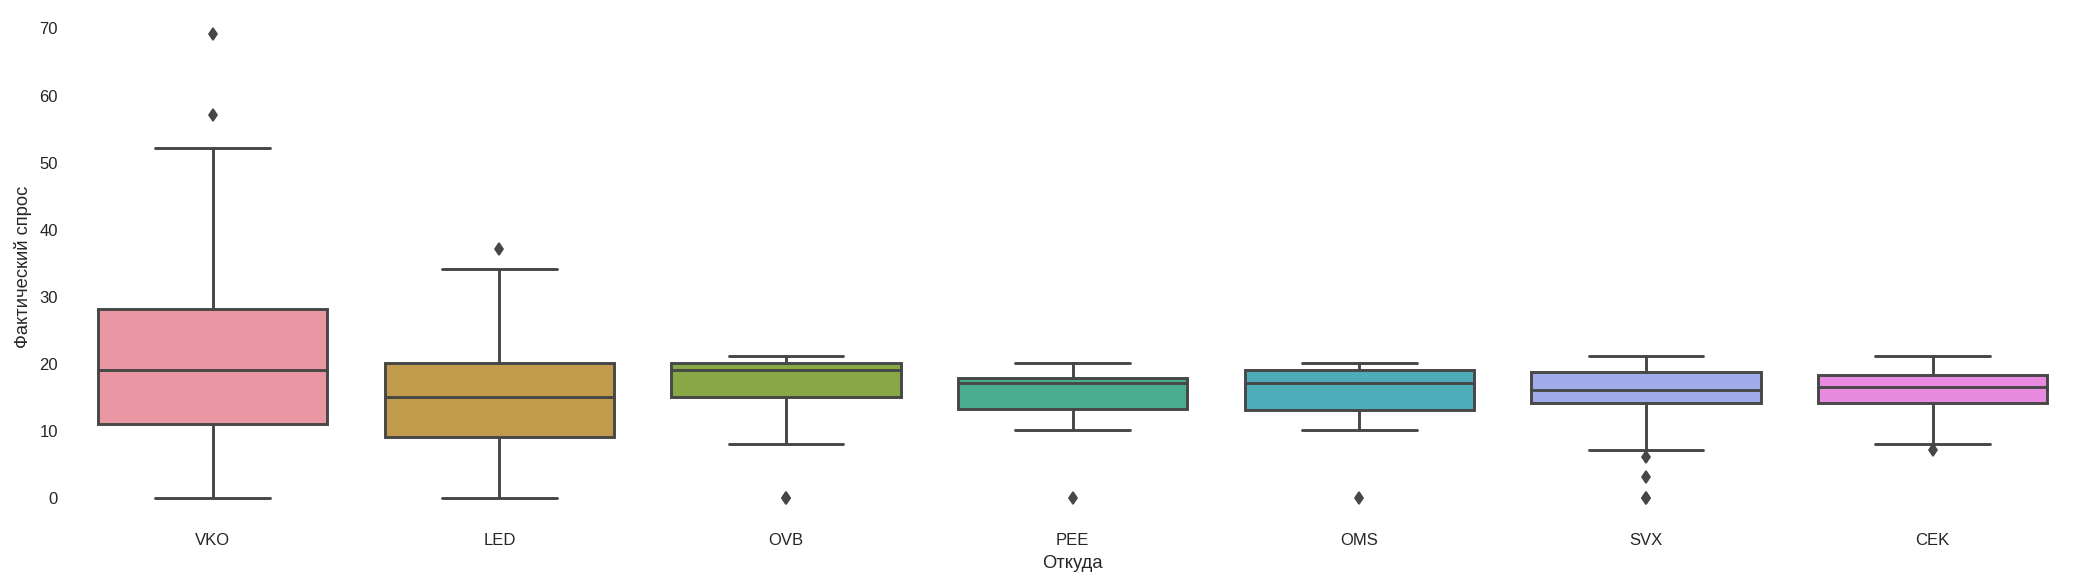

In [72]:
with sns.axes_style('white'):
    sns.catplot(data=df, x='Откуда', y='Фактический спрос', aspect=3.5, kind='box')

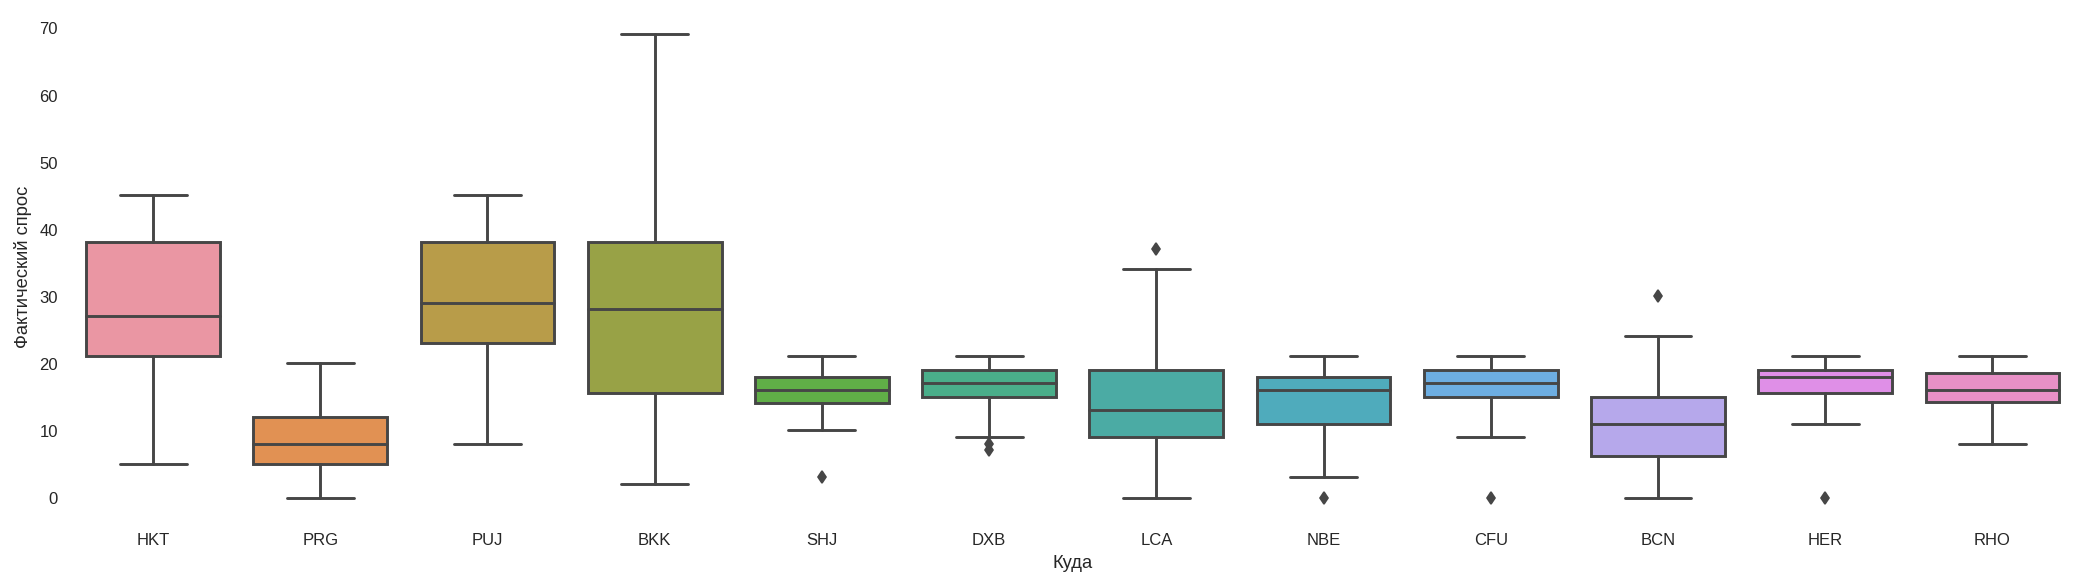

In [73]:
with sns.axes_style('white'):
    sns.catplot(data=df, x='Куда', y='Фактический спрос', aspect=3.5, kind='box')

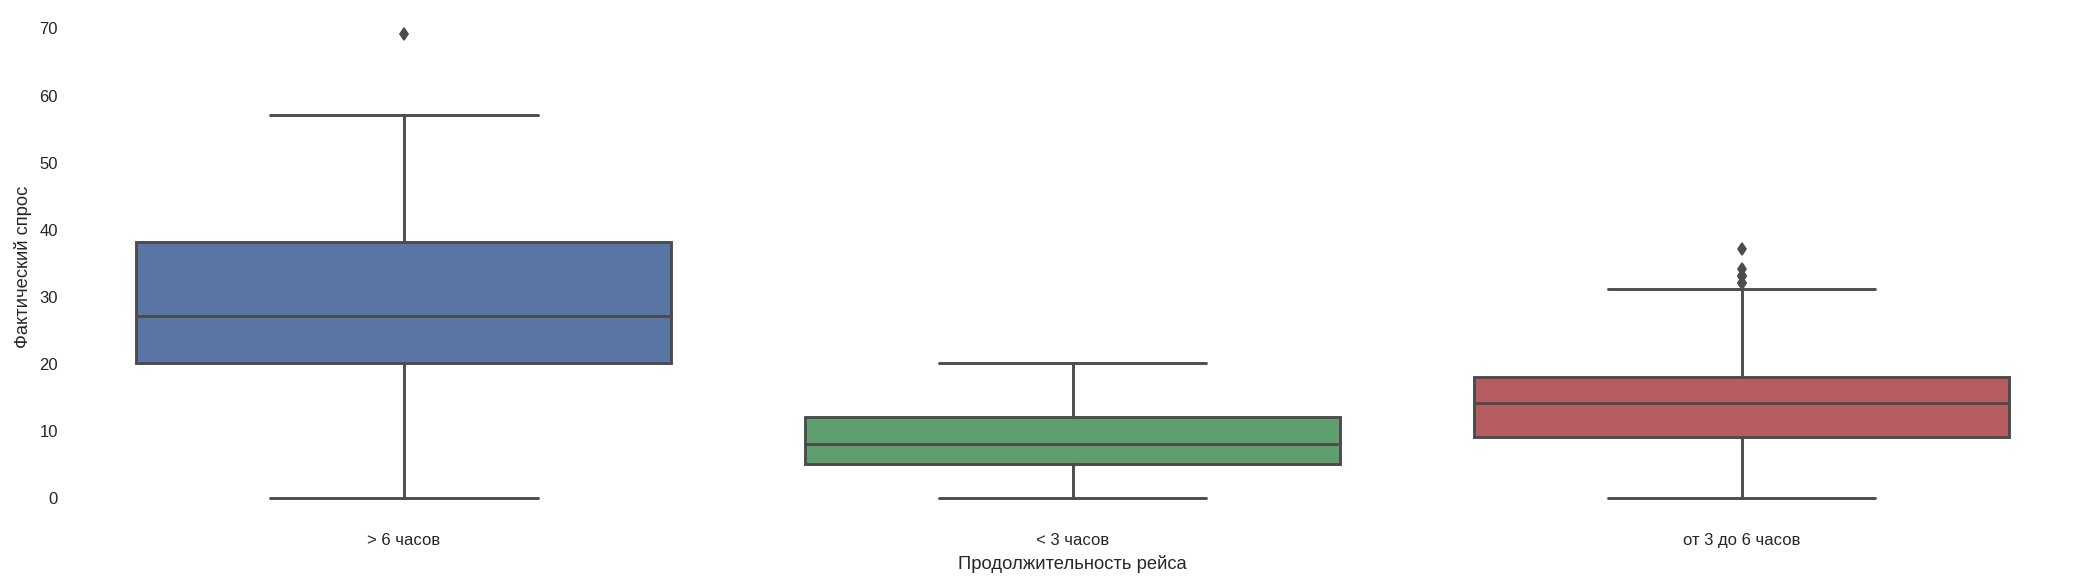

In [74]:
with sns.axes_style('white'):
    sns.catplot(data=df, x='Продолжительность рейса', y='Фактический спрос', aspect=3.5, kind='box')

Чем дольше рейс, тем больше в среднем на нём востребованы услуги.

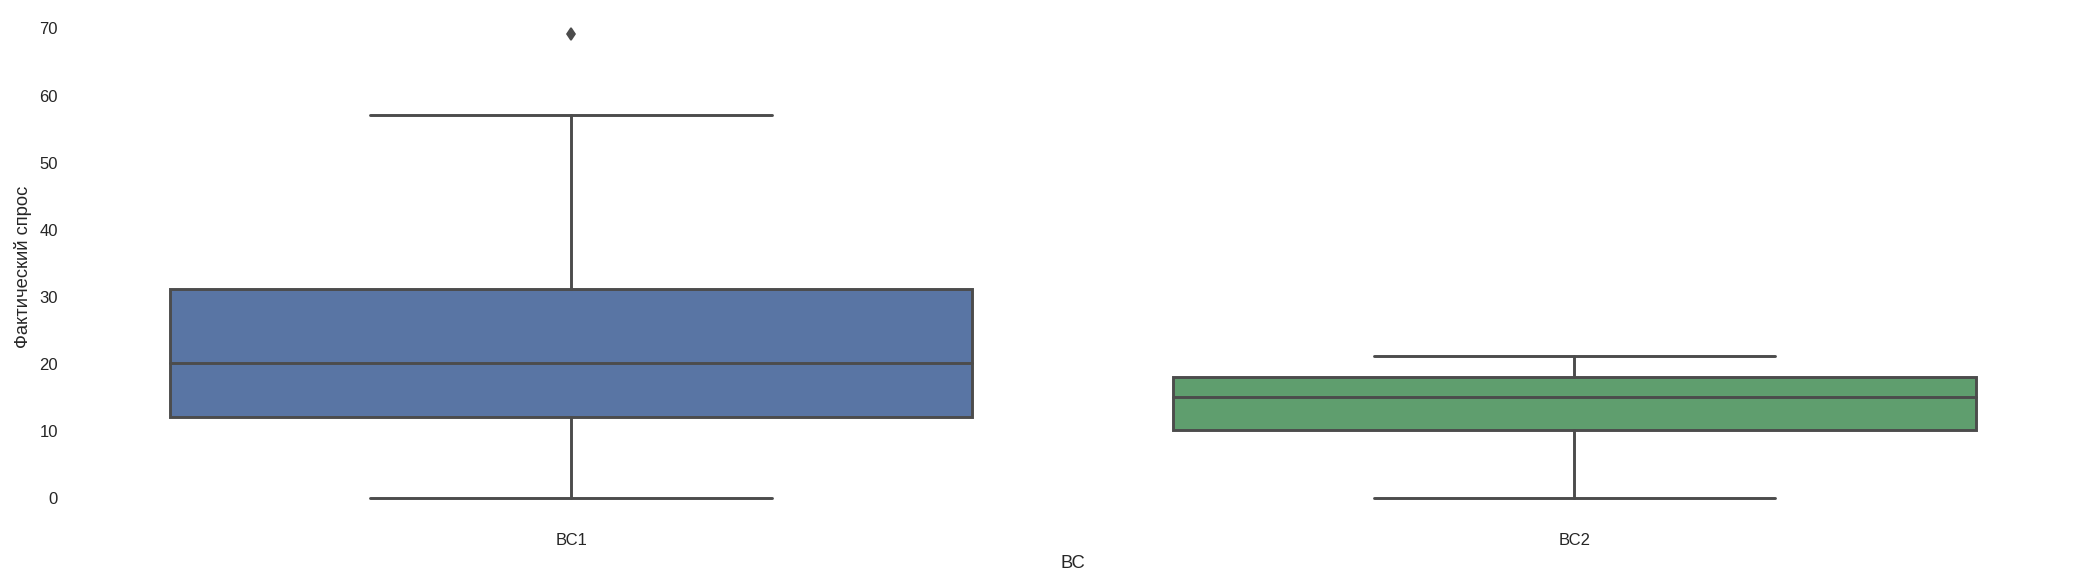

In [75]:
with sns.axes_style('white'):
    sns.catplot(data=df, x='ВС', y='Фактический спрос', aspect=3.5, kind='box')

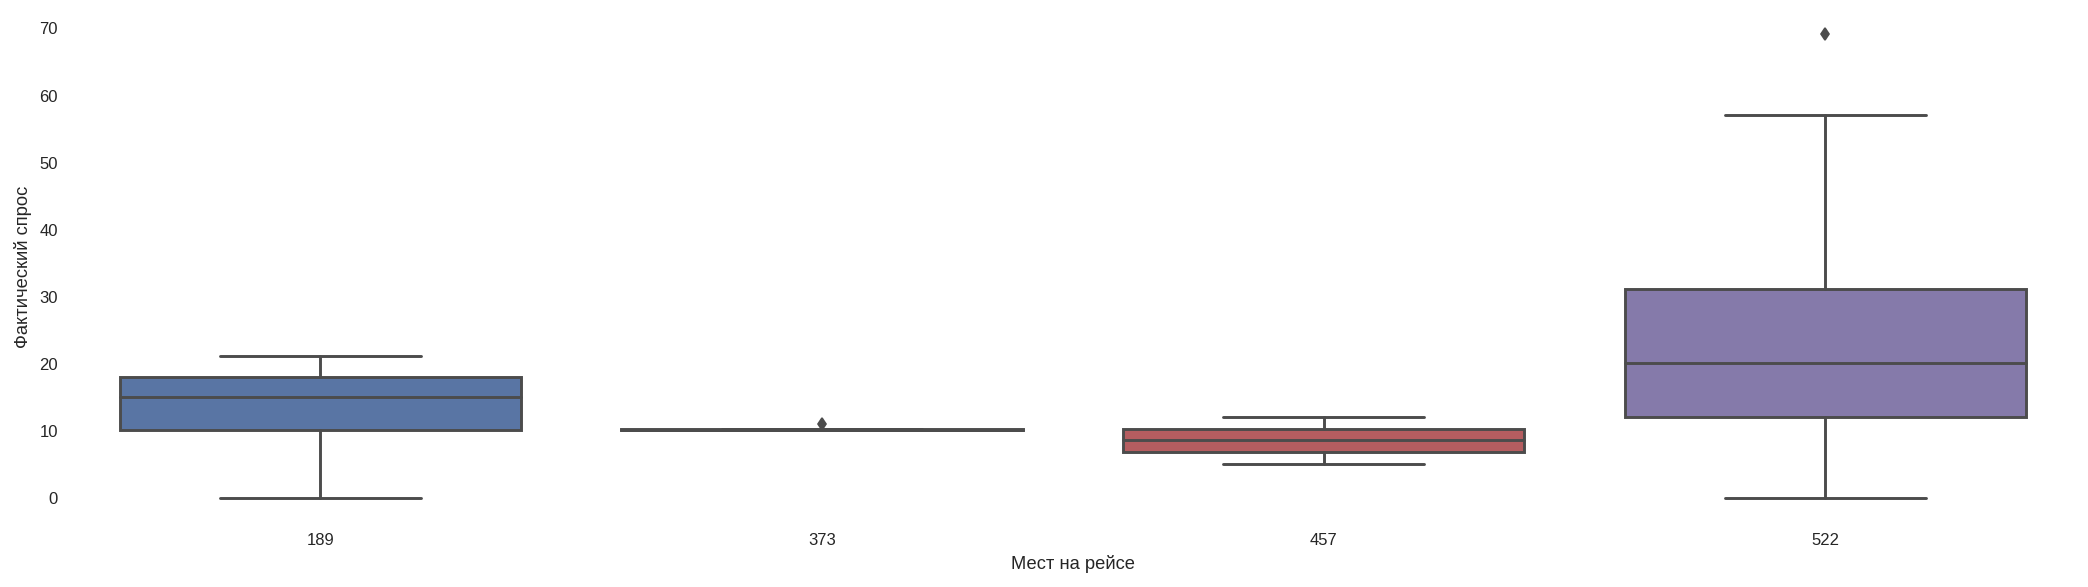

In [76]:
with sns.axes_style('white'):
    sns.catplot(data=df, x='Мест на рейсе', y='Фактический спрос',aspect=3.5, kind='box')

In [77]:
dict_seats_count = {'457':1,'373':2,'189':3,'522':4}

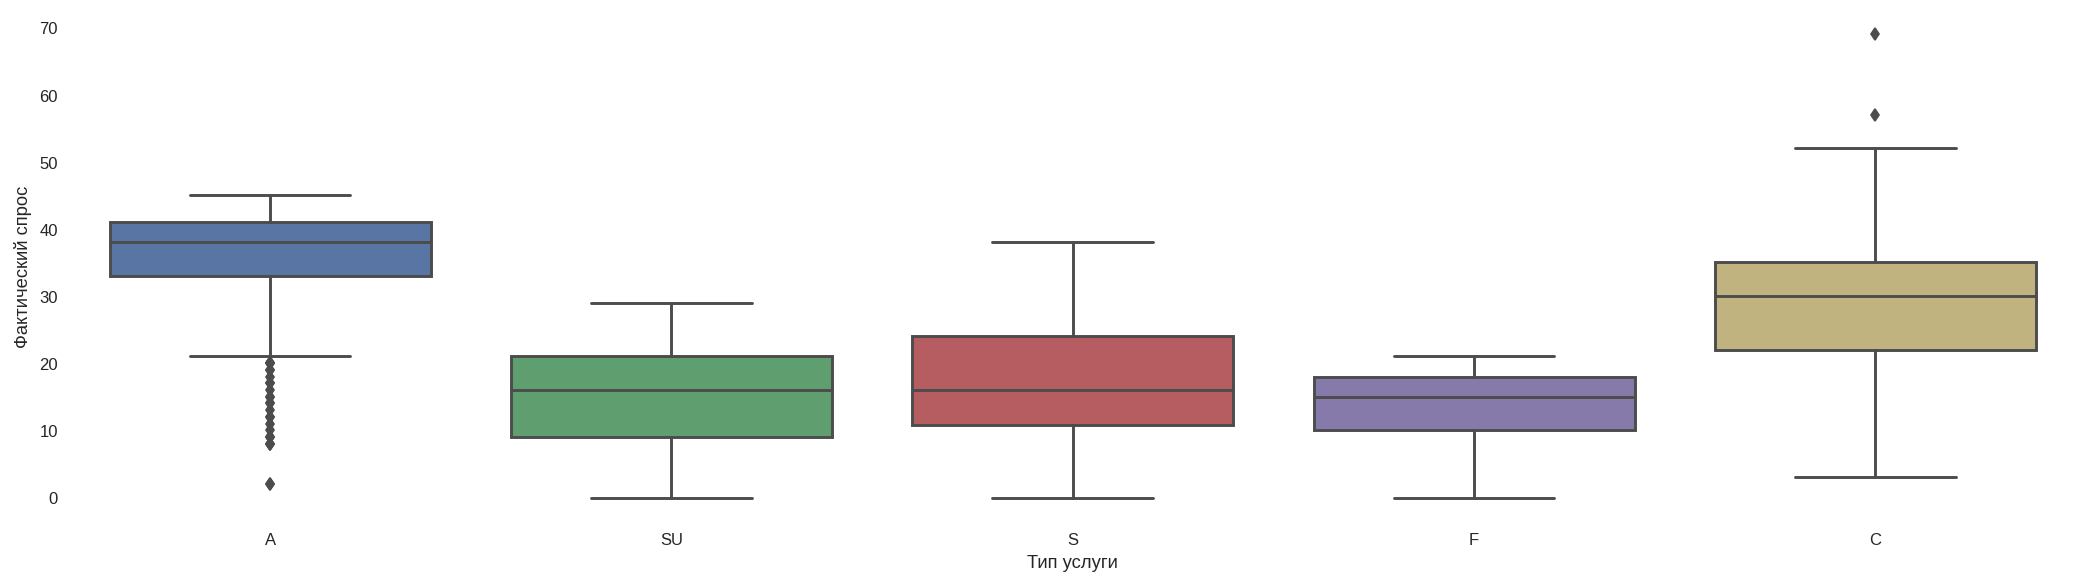

In [78]:
with sns.axes_style('white'):
    sns.catplot(data=df, x='Тип услуги', y='Фактический спрос', aspect=3.5, kind='box')

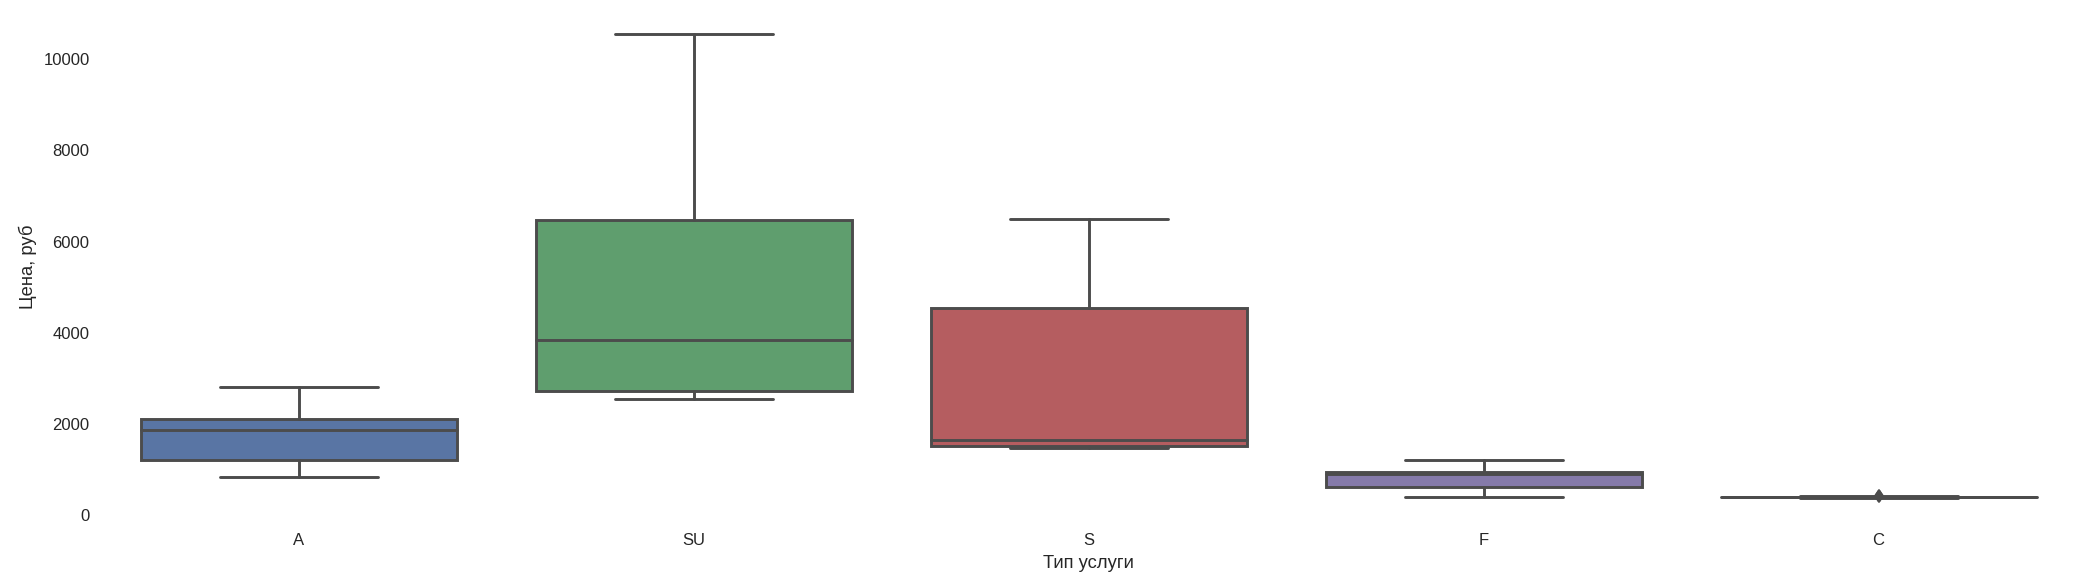

In [79]:
with sns.axes_style('white'):
    sns.catplot(data=df, x='Тип услуги', y='Цена, руб', aspect=3.5, kind='box')

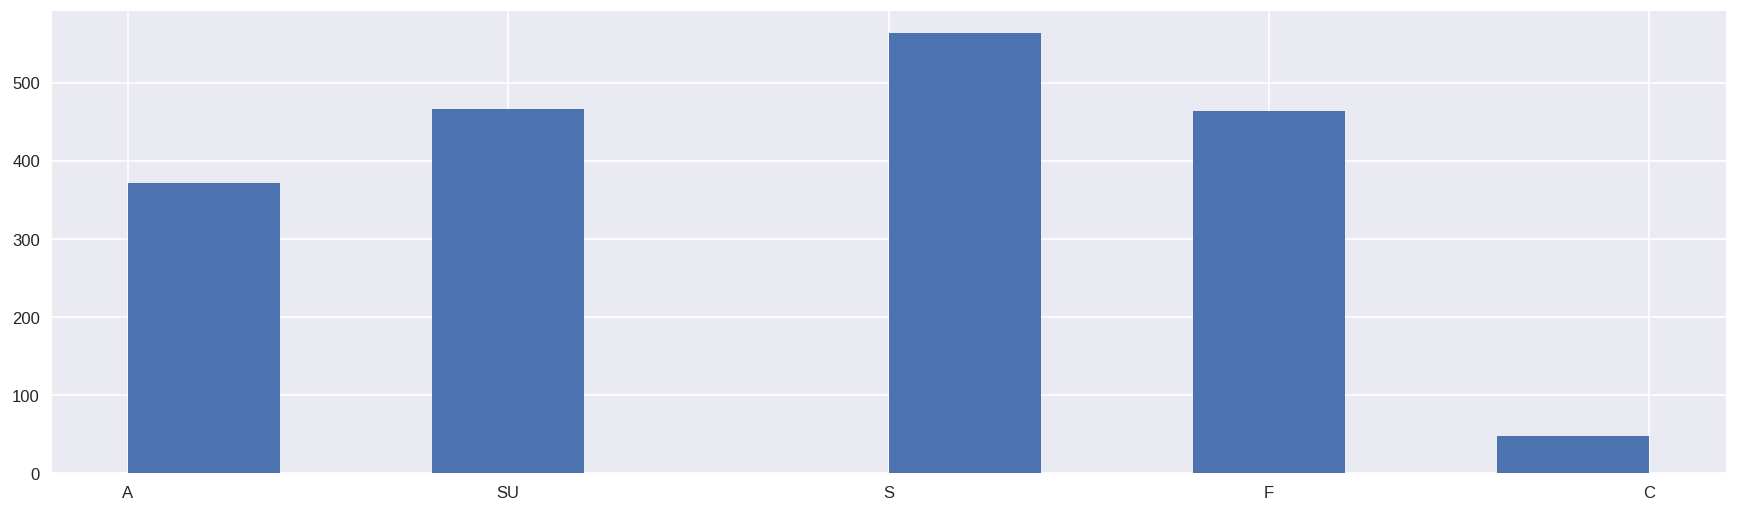

In [80]:
plt.hist(df['Тип услуги']);

Услуга C заметно более редко предоставляется по отношению к другим, при этом является более дешёвой.

In [81]:
df.groupby(['Тип услуги'])['Фактический спрос'].mean()

Тип услуги
A     35.370821
C     29.974359
F     13.868664
S     17.630769
SU    15.119159
Name: Фактический спрос, dtype: float64

# Предобработка

In [82]:
df['День недели'] = pd.DatetimeIndex(df['Дата рейса']).day_of_week

In [83]:
df['пн'] = df['День недели'].apply(lambda x: 1 if x==0 else 0)
df['вт'] = df['День недели'].apply(lambda x: 1 if x==1 else 0)
df['ср'] = df['День недели'].apply(lambda x: 1 if x==2 else 0)
df['чт'] = df['День недели'].apply(lambda x: 1 if x==3 else 0)
df['пт'] = df['День недели'].apply(lambda x: 1 if x==4 else 0)
df['сб'] = df['День недели'].apply(lambda x: 1 if x==5 else 0)
df['вс'] = df['День недели'].apply(lambda x: 1 if x==6 else 0)

In [84]:
df['выходные'] = df['День недели'].apply(lambda x: 1 if x==5 or x==6 else 0)

In [85]:
df['месяц'] = pd.DatetimeIndex(df['Дата рейса']).month

In [86]:
df['год'] = pd.DatetimeIndex(df['Дата рейса']).year

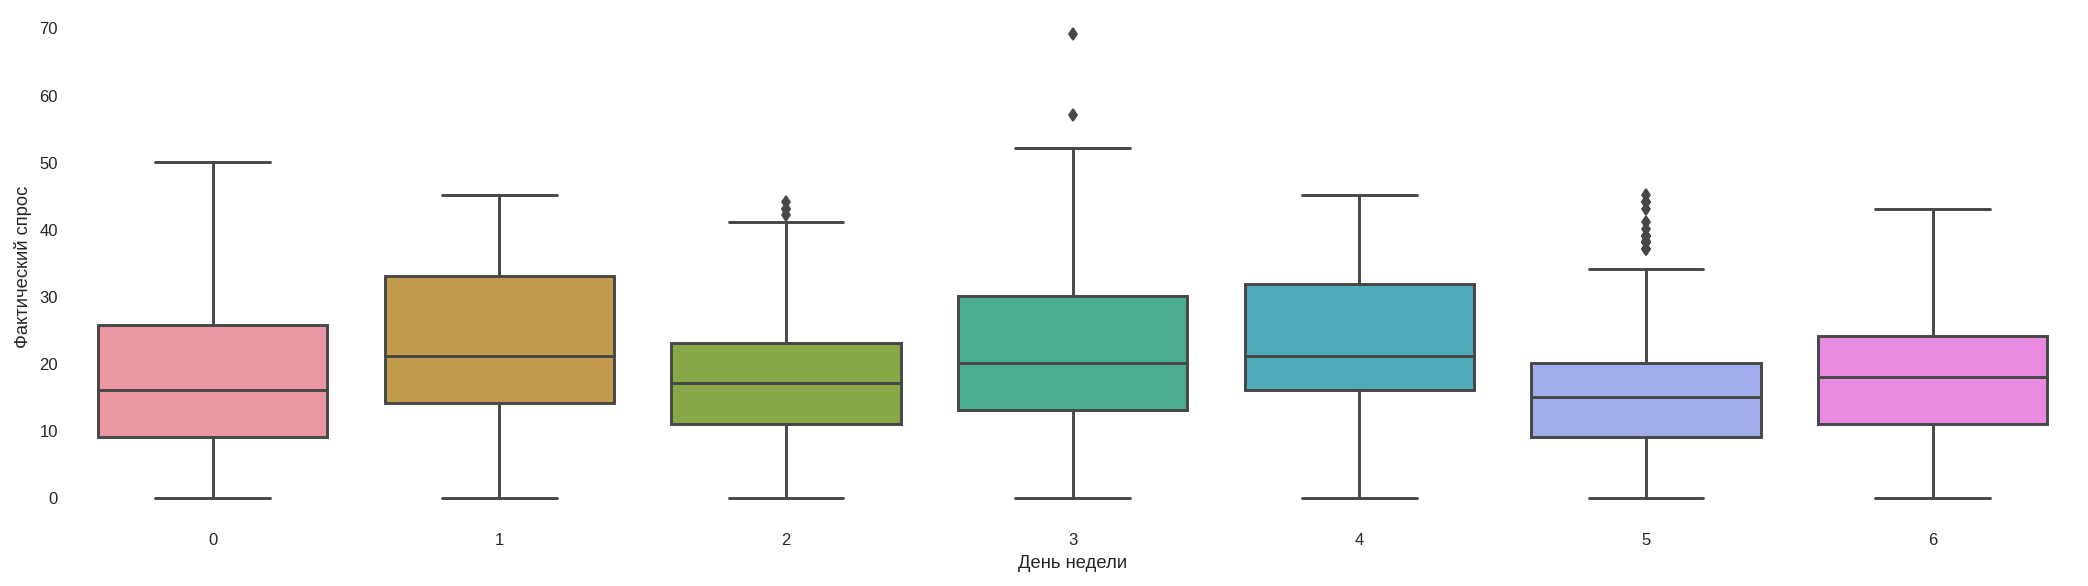

In [87]:
with sns.axes_style('white'):
    sns.catplot(data=df, x='День недели', y='Фактический спрос', aspect=3.5, kind='box')

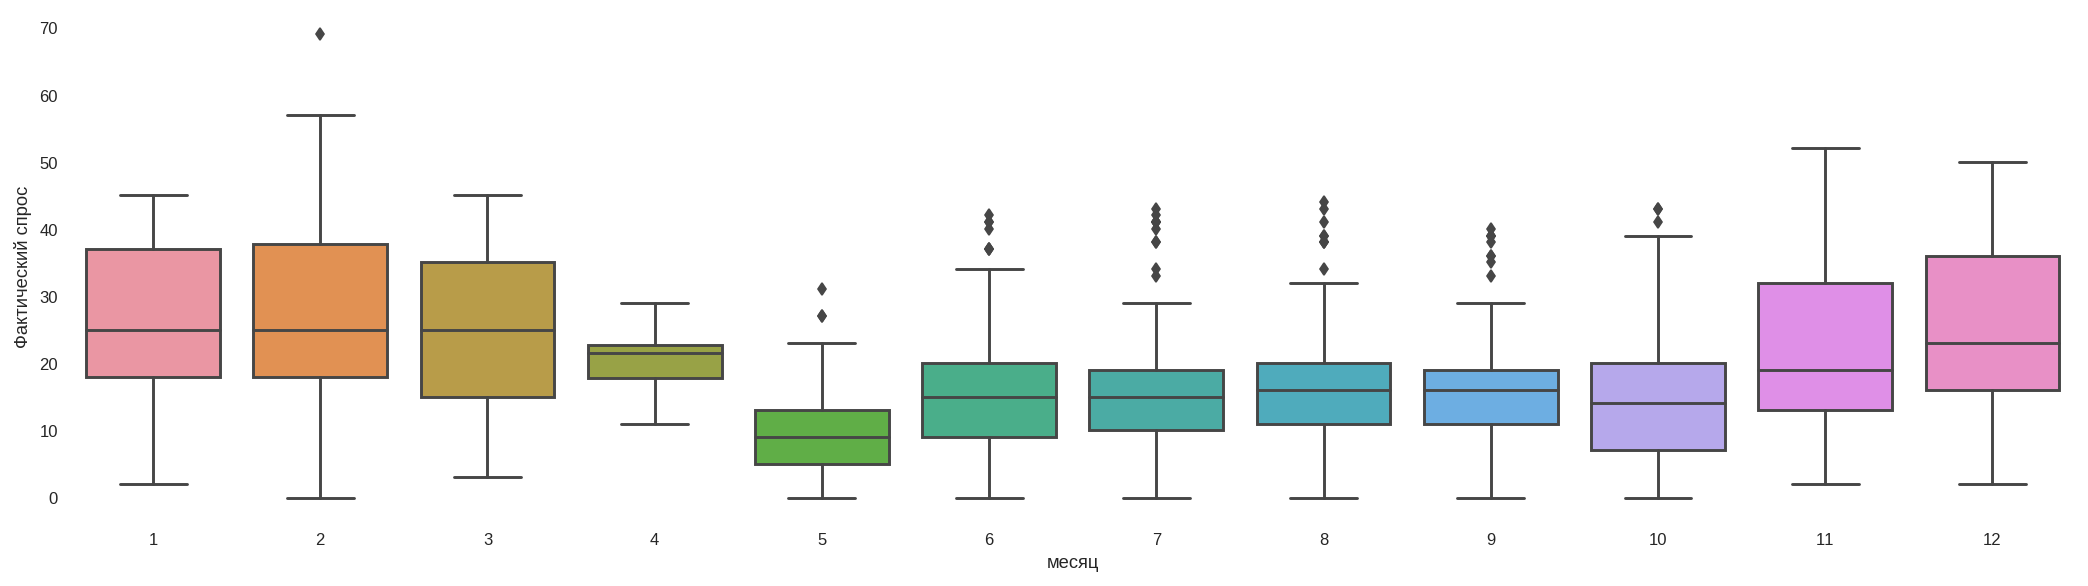

In [88]:
with sns.axes_style('white'):
    sns.catplot(data=df, x='месяц', y='Фактический спрос', aspect=3.5, kind='box')

All-NaN slice encountered


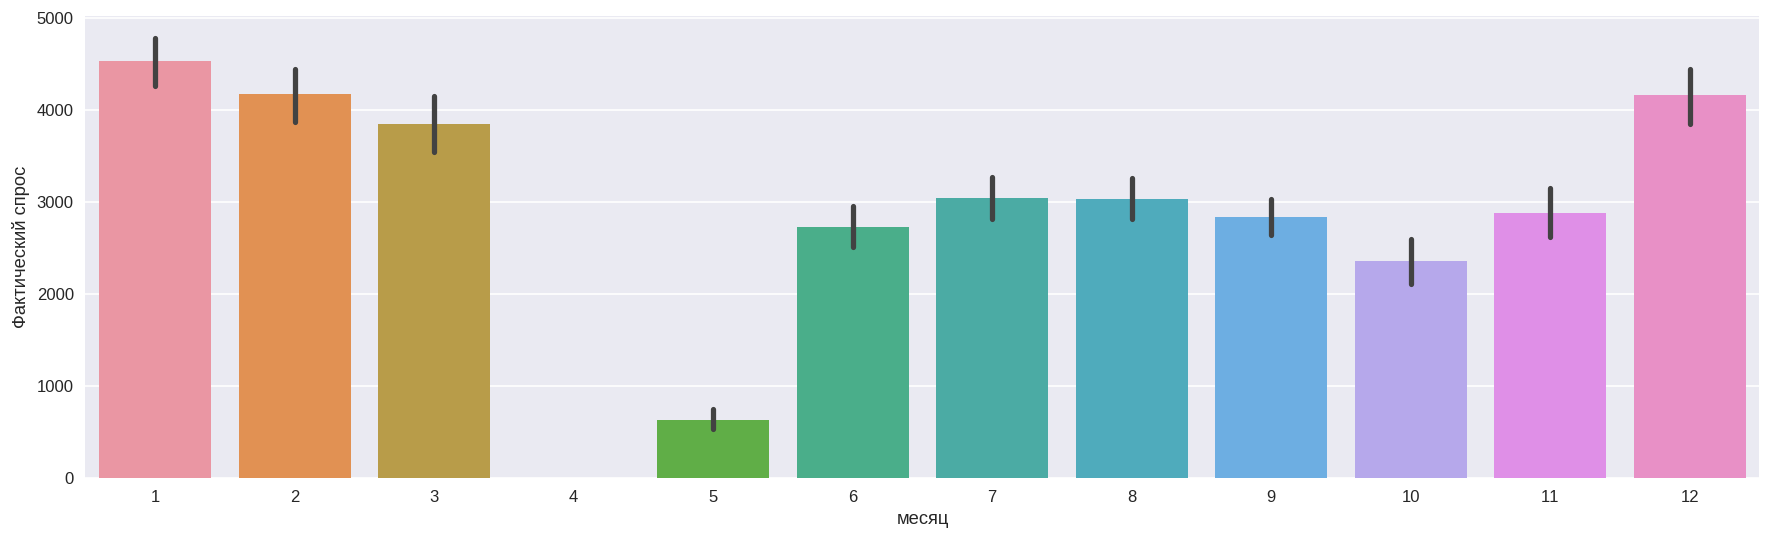

In [89]:
sns.barplot(data=df, x='месяц', y='Фактический спрос', estimator=sum);

In [90]:
df.groupby(['месяц'])['Фактический спрос'].sum().sort_values()

месяц
4      288.0
5      631.0
10    2349.0
6     2728.0
9     2830.0
11    2880.0
8     3033.0
7     3040.0
3     3842.0
12    4154.0
2     4165.0
1     4524.0
Name: Фактический спрос, dtype: float64

Словарь для учёта сезонности по месяцам:

In [91]:
dict_month = {'4':1,'5':2,'10':3,'6':4,'9':5,'11':6,'8':7,'7':8,'3':9,'12':10,'2':11,'1':12}

In [92]:
df['месяц'] = df['месяц'].apply(lambda x: dict_month[str(x)])

Время в полёте:

In [93]:
df['Время в полёте'] = df['Продолжительность рейса'].apply(lambda x: 2 if x == '> 6 часов' else 1 if x=='от 3 до 6 часов' else 0)

Доля проданных мест услуги позволяет сделать вывод о востребованности услуги среди пассажиров:

In [94]:
df['Доля проданных мест услуги'] = df['Фактический спрос']/df['Доступных мест услуги']

Отношение доступных мест к общему максимальному числу пассажиров в салоне позволяет сделать вывод о премиальности услуги:

In [95]:
df['Премиальность'] = df['Доступных мест услуги']/df['Мест на рейсе']

In [96]:
df['ВС'] = df['ВС'].apply(lambda x: 1 if x=='ВС1' else 0)

In [97]:
df['Конфигурация самолёта'] = df['Мест на рейсе'].apply(lambda x: dict_seats_count[str(x)])

Упорядочим аэропорты вылета по суммарному пассажипотоку:

In [98]:
df.groupby(['Откуда'])['Мест на рейсе'].sum().sort_values()

Откуда
CEK      2268
OMS      2457
PEE      2646
OVB      7749
SVX     10962
LED     79974
VKO    736770
Name: Мест на рейсе, dtype: int64

In [99]:
dict_from = {'CEK':0,'OMS':1,'PEE':2,'OVB':3,'SVX':4,'LED':5,'VKO':6}

In [101]:
df.groupby(['Тип услуги'])['Доля проданных мест услуги'].mean().sort_values()

Тип услуги
C     0.091060
S     0.464269
SU    0.549865
F     0.677529
A     0.785696
Name: Доля проданных мест услуги, dtype: float64

Коэффициент востребованности услуг:

In [102]:
df['Востребованность услуги'] = df['Тип услуги'].apply(lambda x: 4 if x=='A' else 3 if x=='F' else 2 if x=='SU' else 1 if x=='S' else 0)

Пассажиропоток из аэропортов:

In [103]:
df['Пассажиропоток'] = df['Откуда'].apply(lambda x: dict_from[x])

Аэропорты прилёта ранжируем по средней стоимости тура в страну:

In [104]:
df['Страна прибытия'] = df['Куда'].apply(lambda x: dict_countries[x])

In [105]:
df

Дата рейса Откуда Куда Продолжительность рейса  ВС  Мест на рейсе  \
0   2018-03-31    VKO  HKT               > 6 часов   1            522   
1   2018-03-31    VKO  HKT               > 6 часов   1            522   
2   2018-03-31    VKO  HKT               > 6 часов   1            522   
3   2018-03-31    VKO  PRG               < 3 часов   0            189   
4   2018-03-30    VKO  HKT               > 6 часов   1            522   
..         ...    ...  ...                     ...  ..            ...   
157 2018-04-30    VKO  BKK               > 6 часов   1            522   
158 2018-04-30    LED  LCA         от 3 до 6 часов   1            522   
159 2018-04-30    VKO  BKK               > 6 часов   1            522   
160 2018-04-30    VKO  PRG               < 3 часов   0            189   
161 2018-04-30    VKO  BKK               > 6 часов   1            522   

    Тип услуги  Доступных мест услуги  Цена, руб  Фактический спрос  ...  \
0            A                     45     1825.0               38.0  ...   
1           SU                     27     6205.0               23.0  ...   
2            S                     39     4380.0               18.0  ...   
3            F                      9      803.0                4.0  ...   
4            A                     45     1825.0               42.0  ...   
..         ...                    ...        ...                ...  ...   
157         SU                     27     5400.0                NaN  ...   
158          A                     45      864.0                NaN  ...   
159          A                     45     1008.0                NaN  ...   
160          F                      9      792.0                NaN  ...   
161          C                    275      360.0                NaN  ...   

     выходные  месяц   год  Время в полёте  Доля проданных мест услуги  \
0           1      9  2018               2                    0.844444   
1           1      9  2018               2                    0.851852   
2           1      9  2018               2                    0.461538   
3           1      9  2018               0                    0.444444   
4           0      9  2018               2                    0.933333   
..        ...    ...   ...             ...                         ...   
157         0      1  2018               2                         NaN   
158         0      1  2018               1                         NaN   
159         0      1  2018               2                         NaN   
160         0      1  2018               0                         NaN   
161         0      1  2018               2                         NaN   

     Премиальность  Конфигурация самолёта  Востребованность услуги  \
0         0.086207                      4                        4   
1         0.051724                      4                        2   
2         0.074713                      4                        1   
3         0.047619                      3                        3   
4         0.086207                      4                        4   
..             ...                    ...                      ...   
157       0.051724                      4                        2   
158       0.086207                      4                        4   
159       0.086207                      4                        4   
160       0.047619                      3                        3   
161       0.526820                      4                        0   

     Пассажиропоток  Страна прибытия  
0                 6                7  
1                 6                7  
2                 6                7  
3                 6                1  
4                 6                7  
..              ...              ...  
157               6                7  
158               5                6  
159               6                7  
160               6                1  
161               6                7  

[1912 rows x 28

Взаимная корреляция признаков:

<AxesSubplot:>

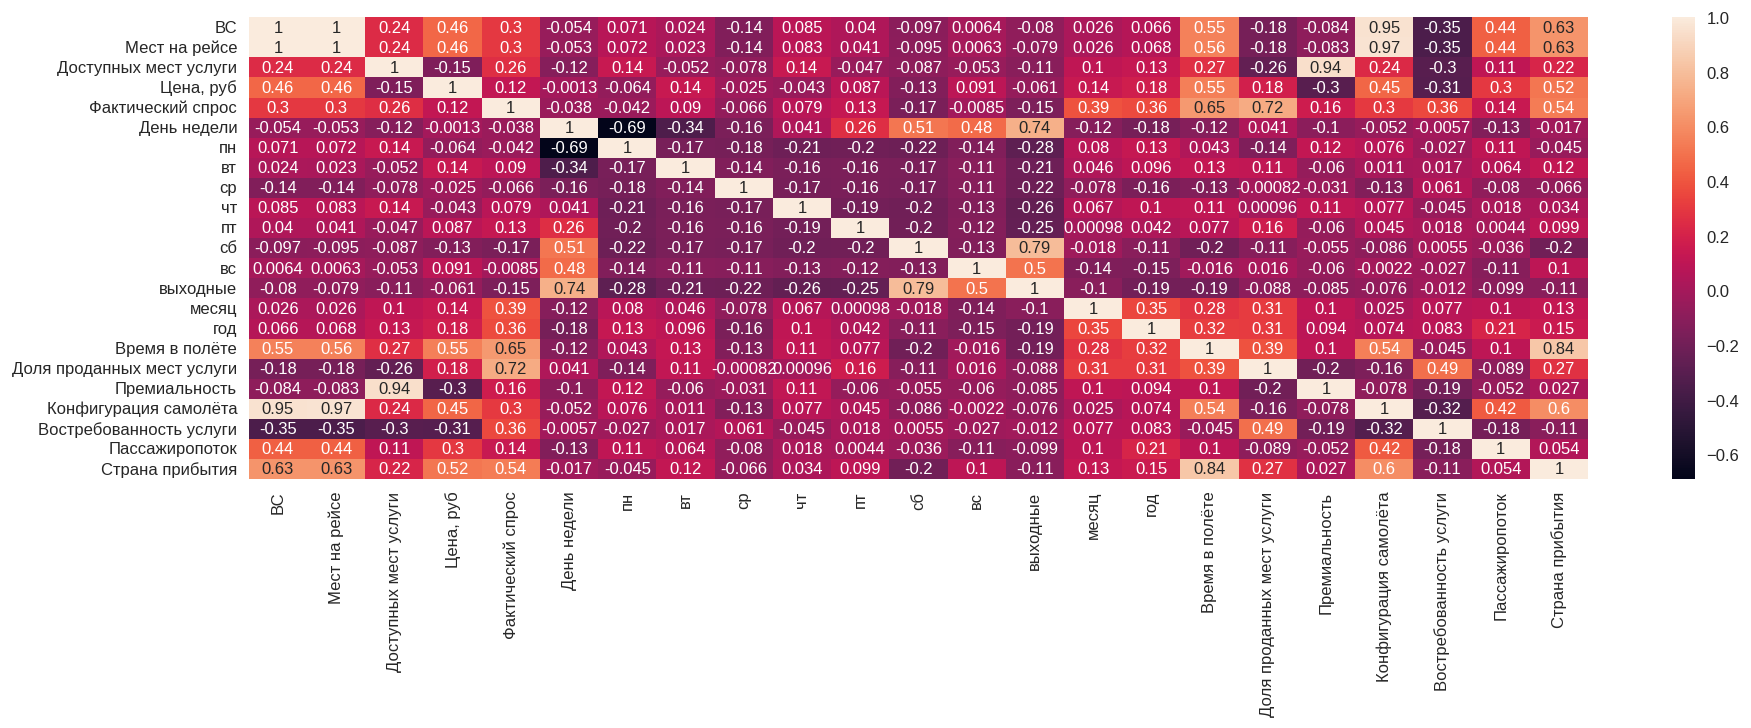

In [106]:
sns.heatmap(df.corr(), annot=True)

Корреляция с таргетом:

In [107]:
df.corr()['Фактический спрос'].sort_values()

сб                           -0.165752
выходные                     -0.150504
ср                           -0.065578
пн                           -0.041911
День недели                  -0.038029
вс                           -0.008522
чт                            0.078814
вт                            0.089916
Цена, руб                     0.120476
пт                            0.132284
Пассажиропоток                0.136825
Премиальность                 0.162102
Доступных мест услуги         0.259423
ВС                            0.296378
Мест на рейсе                 0.298967
Конфигурация самолёта         0.300933
Востребованность услуги       0.356914
год                           0.364907
месяц                         0.387164
Страна прибытия               0.535007
Время в полёте                0.648516
Доля проданных мест услуги    0.717024
Фактический спрос             1.000000
Name: Фактический спрос, dtype: float64

У колонок ВС, конфигурация самолёта и мест на рейсе мультиколлинеарность. Конфигурация самолёта останется как наиболее полно отражающая данные, остальные 2 убираем. Также выбрасываем вспомогательные колонки.

In [108]:
df = df.drop(columns=['выходные','День недели','Дата рейса','Откуда','Куда','Продолжительность рейса','ВС','Мест на рейсе','Тип услуги','Доля проданных мест услуги'])

In [109]:
df

Доступных мест услуги  Цена, руб  Фактический спрос  пн  вт  ср  чт  пт  \
0                       45     1825.0               38.0   0   0   0   0   0   
1                       27     6205.0               23.0   0   0   0   0   0   
2                       39     4380.0               18.0   0   0   0   0   0   
3                        9      803.0                4.0   0   0   0   0   0   
4                       45     1825.0               42.0   0   0   0   0   1   
..                     ...        ...                ...  ..  ..  ..  ..  ..   
157                     27     5400.0                NaN   1   0   0   0   0   
158                     45      864.0                NaN   1   0   0   0   0   
159                     45     1008.0                NaN   1   0   0   0   0   
160                      9      792.0                NaN   1   0   0   0   0   
161                    275      360.0                NaN   1   0   0   0   0   

     сб  вс  месяц   год  Время в полёте  Премиальность  \
0     1   0      9  2018               2       0.086207   
1     1   0      9  2018               2       0.051724   
2     1   0      9  2018               2       0.074713   
3     1   0      9  2018               0       0.047619   
4     0   0      9  2018               2       0.086207   
..   ..  ..    ...   ...             ...            ...   
157   0   0      1  2018               2       0.051724   
158   0   0      1  2018               1       0.086207   
159   0   0      1  2018               2       0.086207   
160   0   0      1  2018               0       0.047619   
161   0   0      1  2018               2       0.526820   

     Конфигурация самолёта  Востребованность услуги  Пассажиропоток  \
0                        4                        4               6   
1                        4                        2               6   
2                        4                        1               6   
3                        3                        3               6   
4                        4                        4               6   
..                     ...                      ...             ...   
157                      4                        2               6   
158                      4                        4               5   
159                      4                        4               6   
160                      3                        3               6   
161                      4                        0               6   

     Страна прибытия  
0                  7  
1                  7  
2                  7  
3                  1  
4                  7  
..               ...  
157                7  
158                6  
159                7  
160                1  
161                7  

[1912 rows x 18 columns]

Разобьём выборку на train, valid и test:

In [110]:
X_tr_val, X_test, y_tr_val, y_test = train_test_split(df.drop(columns=['Фактический спрос']), df['Фактический спрос'], train_size=1750, shuffle=False)

In [112]:
X_train, X_valid, y_train, y_valid = train_test_split(X_tr_val, y_tr_val, test_size=.2)

# Модель и предсказание

Будем использовать модель CatBoost, параметры подберём с помощью сетки:

In [122]:
clf = CatBoostRegressor()
params = {
    'iterations': [1000, 1100],
    'learning_rate': [0.02, 0.01],
    'depth': [6, 8],
    'grow_policy':['SymmetricTree', 'Depthwise'],
    'boosting_type':['Ordered','Plain']
}
cv = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=4)

In [123]:
cv.fit(X_train, y_train);

0:	learn: 11.1958703	total: 48.5ms	remaining: 48.5s
1:	learn: 11.0474222	total: 49.3ms	remaining: 24.6s
2:	learn: 10.9048684	total: 50.4ms	remaining: 16.7s
3:	learn: 10.7697400	total: 50.9ms	remaining: 12.7s
4:	learn: 10.6310315	total: 52ms	remaining: 10.3s
5:	learn: 10.4955959	total: 53ms	remaining: 8.78s
6:	learn: 10.3650018	total: 54ms	remaining: 7.66s
7:	learn: 10.2372176	total: 55.1ms	remaining: 6.84s
8:	learn: 10.1139970	total: 56.2ms	remaining: 6.19s
0:	learn: 11.4078286	total: 48.5ms	remaining: 48.4s
9:	learn: 9.9916736	total: 57.2ms	remaining: 5.67s
1:	learn: 11.2551752	total: 49.4ms	remaining: 24.7s
10:	learn: 9.8728189	total: 58.3ms	remaining: 5.24s
11:	learn: 9.7558031	total: 59.4ms	remaining: 4.89s
2:	learn: 11.1070209	total: 50.8ms	remaining: 16.9s
3:	learn: 10.9669008	total: 51.4ms	remaining: 12.8s
12:	learn: 9.6487767	total: 60.6ms	remaining: 4.6s
4:	learn: 10.8274323	total: 56.9ms	remaining: 11.3s
13:	learn: 9.5417806	total: 65.6ms	remaining: 4.62s
14:	learn: 9.4365989


40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nikinho/miniforge3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nikinho/miniforge3/lib/python3.10/site-packages/catboost/core.py", line 5730, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "/home/nikinho/miniforge3/lib/python3.10/site-packages/catboost/core.py", line 2339, in _fit
    train_params = self._prepare_train_params(
  File "/home/nikinho/mini

20:	learn: 8.8083989	total: 69.3ms	remaining: 3.23s
21:	learn: 8.7214870	total: 73.7ms	remaining: 3.28s
22:	learn: 8.6313070	total: 78.4ms	remaining: 3.33s
23:	learn: 8.5455098	total: 82.4ms	remaining: 3.35s
24:	learn: 8.4677228	total: 83ms	remaining: 3.23s
25:	learn: 8.3851504	total: 87.4ms	remaining: 3.27s
26:	learn: 8.3081179	total: 88.1ms	remaining: 3.17s
27:	learn: 8.2281605	total: 92.2ms	remaining: 3.2s
28:	learn: 8.1549664	total: 94.5ms	remaining: 3.16s
29:	learn: 8.0760976	total: 97.2ms	remaining: 3.14s
30:	learn: 8.0046538	total: 101ms	remaining: 3.17s
31:	learn: 7.9379551	total: 103ms	remaining: 3.1s
32:	learn: 7.8660101	total: 106ms	remaining: 3.12s
33:	learn: 7.8015725	total: 111ms	remaining: 3.16s
34:	learn: 7.7376237	total: 115ms	remaining: 3.18s
35:	learn: 7.6714068	total: 120ms	remaining: 3.22s
36:	learn: 7.6156600	total: 123ms	remaining: 3.19s
37:	learn: 7.5568757	total: 126ms	remaining: 3.2s
38:	learn: 7.4975680	total: 128ms	remaining: 3.16s
39:	learn: 7.4356594	total

Лучшие параметры, score и модель:

In [124]:
cv.best_params_

{'boosting_type': 'Ordered',
 'depth': 8,
 'grow_policy': 'SymmetricTree',
 'iterations': 1000,
 'learning_rate': 0.02}

In [125]:
cv.best_score_

0.7811724801071052

In [126]:
best_model = cv.best_estimator_

In [129]:
best_model.score(X_train, y_train)

0.8385231813257594

In [131]:
best_model.score(X_valid, y_valid)

0.7897986918598224

Построим график SHAP-values для оценки важности наших колонок:

In [127]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)

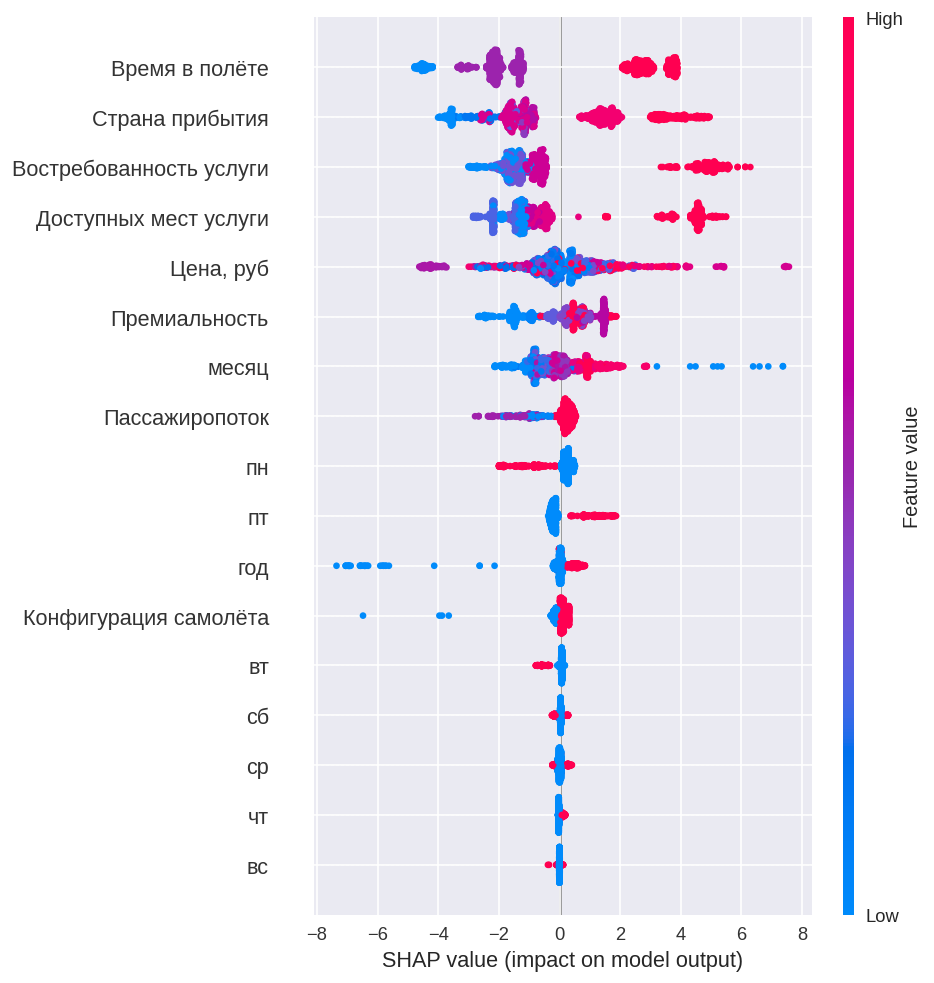

In [128]:
shap.summary_plot(shap_values, X_train)

Дополнительно данные можно было бы улучшить, добавив время вылета для понимания того, является ли рейс ночным или дневным. Также, возможно данные хорошо дополнит информация о пассажирах (средний возраст, соотношение мужчин и женщин и т.д.).

Сохраним предсказание на тестовой выборке в csv-файл:

In [138]:
predict = pd.DataFrame(best_model.predict(X_test),columns=['Фактический спрос'])

In [141]:
predict.to_csv('prediction.csv', index=False)

In [142]:
pd.read_csv('prediction.csv')

Фактический спрос
0            18.871844
1            18.192992
2            10.204686
3            34.331359
4            36.441702
..                 ...
157          17.321026
158          24.715320
159          34.060854
160          10.424855
161          21.901517

[162 rows x 1 columns]